# Course: Natural Language Processing
## Week 8: N-Grams and Collocations

Python Skills Required:
* List Comprehension [More info](https://www.w3schools.com/python/python_lists_comprehension.asp)

In [ ]:
%%capture

import nltk
nltk.download('book')
nltk.download('gutenberg')
import nltk.book

## 1. Load the Book

![](https://couverture.numilog.com/9789895621606_w300.jpg)

In [ ]:
text = nltk.book.text1
text

<Text: Moby Dick by Herman Melville 1851>

In [ ]:
bigrams = nltk.book.bigrams(text)
listOfBigrams = list(bigrams)
listOfBigrams[:9]

[('[', 'Moby'),
 ('Moby', 'Dick'),
 ('Dick', 'by'),
 ('by', 'Herman'),
 ('Herman', 'Melville'),
 ('Melville', '1851'),
 ('1851', ']'),
 (']', 'ETYMOLOGY'),
 ('ETYMOLOGY', '.')]

In [ ]:
fdist = nltk.FreqDist(listOfBigrams)
fdist.most_common(10)

[((',', 'and'), 2607),
 (('of', 'the'), 1847),
 (("'", 's'), 1737),
 (('in', 'the'), 1120),
 ((',', 'the'), 908),
 ((';', 'and'), 853),
 (('to', 'the'), 712),
 (('.', 'But'), 596),
 ((',', 'that'), 584),
 (('.', '"'), 557)]

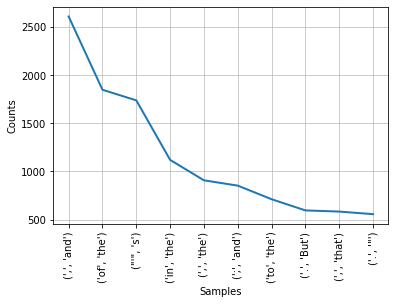

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
fdist.plot(10)

In [ ]:
def bigramIsMeaningful(bigram):
  word1 = bigram[0].lower()
  word2 = bigram[1].lower()
  minSize = 2
  if len(word1) > minSize and len(word2) > minSize:
    return True
  else:
    return False

filteredBigrams = [ bigram for bigram in listOfBigrams if bigramIsMeaningful(bigram) ]
filteredDist = nltk.FreqDist(filteredBigrams)
filteredDist.most_common(10)

[(('from', 'the'), 428),
 (('the', 'whale'), 369),
 (('and', 'the'), 357),
 (('with', 'the'), 308),
 (('for', 'the'), 285),
 (('into', 'the'), 246),
 (('the', 'ship'), 235),
 (('the', 'sea'), 223),
 (('upon', 'the'), 216),
 (('that', 'the'), 215)]

## Filter manually

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

language = 'english'
listOfStopWords = list(stopwords.words(language))

# Print the first ten stopwords
print('\nStopwords:\t',listOfStopWords[:10])


Stopwords:	 ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [ ]:
def bigramIsMeaningful(bigram):
  word1 = bigram[0].lower()
  word2 = bigram[1].lower()
  minSize = 3
  if word1 in listOfStopWords or word2 in listOfStopWords:
    return False
  elif len(word1) < minSize or len(word2) < minSize:
    return False
  else:
    return True

filteredBigrams = [ bigram for bigram in listOfBigrams if bigramIsMeaningful(bigram) ]
filteredDist = nltk.FreqDist(filteredBigrams)
filteredDist.most_common(10)

[(('Sperm', 'Whale'), 118),
 (('Moby', 'Dick'), 83),
 (('old', 'man'), 80),
 (('White', 'Whale'), 74),
 (('Captain', 'Ahab'), 61),
 (('sperm', 'whale'), 55),
 (('Right', 'Whale'), 38),
 (('Captain', 'Peleg'), 32),
 (('cried', 'Ahab'), 32),
 (('white', 'whale'), 31)]

## Collocations

### Pointwise Mutual Information (PMI)

$PMI=log(\frac{P(w1,w2)}{P(w_1)P(w_2)})$

$PMI=log(\frac{P(bigram)}{P(word1)P(word2)})$

In [ ]:
import pandas as pd

In [ ]:
words = list(text)
wordsFreq = nltk.FreqDist(words)

bigrams = nltk.book.bigrams(text)
bigrams = list(bigrams)
uniqueBigrams = list(set(bigrams))

bigramsFreq = nltk.FreqDist(bigrams)

df = pd.DataFrame()
df['bigram'] = uniqueBigrams
df['word1'] = df['bigram'].apply(lambda bigram: bigram[0])
df['word2'] = df['bigram'].apply(lambda bigram: bigram[1])
df['bigramFreq'] = df['bigram'].apply(lambda bigram: bigramsFreq[bigram])
df['word1Freq'] = df['word1'].apply(lambda word: wordsFreq[word])
df['word2Freq'] = df['word2'].apply(lambda word: wordsFreq[word])
df

bigram    word1      word2  bigramFreq  word1Freq  \
0              (of, good)       of       good           6       6536   
1          (morning, the)  morning        the           2         68   
2              (folio, .)    folio          .           1          2   
3          (coffin, with)   coffin       with           3         36   
4       (cranial, cavity)  cranial     cavity           1          2   
...                   ...      ...        ...         ...        ...   
118743         (acts, in)     acts         in           1          3   
118744  (seen, doubloons)     seen  doubloons           1        161   
118745     (teeter, over)   teeter       over           1          1   
118746        (the, hour)      the       hour           2      13721   
118747       (rallied, .)  rallied          .           1          3   

        word2Freq  
0             192  
1           13721  
2            6862  
3            1659  
4               5  
...           ...  
118743       3916  
118744          7  
118745        403  
118746         40  
118747       6862  

[118748 rows x 6 columns]

In [ ]:
import math

nWords = len(words)
nBigrams = len(bigrams)

def calculatePMI(row):
  probBigram = row['bigramFreq'] / nBigrams
  probWord1 = row['word1Freq'] / nWords
  probWord2 = row['word2Freq'] / nWords
  value = probBigram / (probWord1 * probWord2)
  logBase = 2
  pmi = math.log(value, logBase)
  return pmi

df['PMI'] = df[['bigramFreq','word1Freq','word2Freq']].apply(lambda row: calculatePMI(row), axis=1)
df.sort_values(by = 'PMI')

bigram      word1        word2  bigramFreq  word1Freq  \
50391                (the, in)        the           in           1      13721   
109218                  (., a)          .            a           1       6862   
101484                (of, to)         of           to           1       6536   
88401                (the, as)        the           as           1      13721   
103579                (., and)          .          and           2       6862   
...                        ...        ...          ...         ...        ...   
39903        (wery, woracious)       wery    woracious           1          1   
13324   (atrocious, scoundrel)  atrocious    scoundrel           1          1   
27853            (Kit, Carson)        Kit       Carson           1          1   
81095       (103, Measurement)        103  Measurement           1          1   
79172       (Mohawk, counties)     Mohawk     counties           1          1   

        word2Freq        PMI  
50391        3916  -7.686568  
109218       4569  -6.909381  
101484       4542  -6.830609  
88401        1620  -6.413181  
103579       6024  -6.308224  
...           ...        ...  
39903           1  17.992695  
13324           1  17.992695  
27853           1  17.992695  
81095           1  17.992695  
79172           1  17.992695  

[118748 rows x 7 columns]

### Let's visualize the Collocations

In [ ]:
df['logBigramFreq'] = df['bigramFreq'].apply(lambda freq: math.log(freq,2))
df

bigram    word1      word2  bigramFreq  word1Freq  \
0              (of, good)       of       good           6       6536   
1          (morning, the)  morning        the           2         68   
2              (folio, .)    folio          .           1          2   
3          (coffin, with)   coffin       with           3         36   
4       (cranial, cavity)  cranial     cavity           1          2   
...                   ...      ...        ...         ...        ...   
118743         (acts, in)     acts         in           1          3   
118744  (seen, doubloons)     seen  doubloons           1        161   
118745     (teeter, over)   teeter       over           1          1   
118746        (the, hour)      the       hour           2      13721   
118747       (rallied, .)  rallied          .           1          3   

        word2Freq        PMI  logBigramFreq  
0             192   0.318503       2.584963  
1           13721  -0.838866       1.000000  
2            6862   4.248282       0.000000  
3            1659   3.711634       1.584963  
4               5  14.670767       0.000000  
...           ...        ...            ...  
118743       3916   4.472567       0.000000  
118744          7   7.854423       0.000000  
118745        403   9.338059       0.000000  
118746         40  -0.073331       1.000000  
118747       6862   3.663319       0.000000  

[118748 rows x 8 columns]

In [ ]:
import plotly.express as px

In [ ]:
#@title Plot all the bigrams
#@markdown Run this cell to visualize all the bigrams. No cleanning applied to it.

def plotPMI(df):
  fig = px.scatter(x=df['PMI'].values,
                  y=df['logBigramFreq'],
                  color= df['PMI'] + df['logBigramFreq'],
                  hover_name = df['bigram'].values,
                  width = 600,
                  height = 600,
                  labels = { 'x':'PMI', 'y':'log(BigramFrequency'}
                  )
  fig.show()

plotPMI(df)

In [ ]:
#@title Plot Meaningful words
#@markdown Run this cell to visualize only the bigrams that are composed by meaningful words

minSize = 2
df['isMeaningful'] = df['bigram'].apply(bigramIsMeaningful)
cleanedDf = df[df['isMeaningful']]

plotPMI(cleanedDf)

## Auxiliar Plots

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

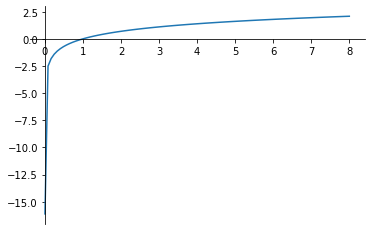

In [ ]:
def cartesianMode(ax):
  ax.spines['top'].set_color('none')
  ax.spines['bottom'].set_position('zero')
  ax.spines['left'].set_position('zero')
  ax.spines['right'].set_color('none')

x = np.linspace(0.0000001,8,100)
y = [math.log(x) for x in x]
plt.plot(x,y)
ax = plt.gca()
cartesianMode(ax)